In [1]:
using PyPlot;

# Aufgabe 1

In [3]:
function mocaint(func, limits, N, args=[])
    dim = size(limits)[1]
    V = 1
    random_numbers = rand(N, dim)
    for i in 1:dim
        V *= limits[i,2]-limits[i,1] # Volumen berechnen
        # die Zufallszahlen muessen an das Intervall angepasst werden
        random_numbers[:,i] = random_numbers[:,i]*(limits[i,2]-limits[i,1])+limits[i,1]
    end
    sum = 0.
    for i in 1:N
        sum += func(random_numbers[i,:]...,args...)
    end
    return V/N*sum
end
function custom_mean(array)
    M = mean(array)
    Delta_M = mean(abs.(array-M))
    return [M Delta_M]
end
;

In [4]:
f(x,y,z) = sin(x*(y+2*z))

limits = [0 1;0 1; 0 1]
M = 100
for N in Int.([1e2 1e3 1e4])
    calculations = Array{Float64}(M)
    for i in 1:M
        calculations[i] = mocaint(f, limits, N)
    end
    (MEAN, DMEAN) = custom_mean(calculations)
    MEAN = round(MEAN, 5)
    DMEAN = round(DMEAN, 5)
    println("Bei $M Durchlaeufen mit $N Zufallszahlen ist der durchschnittliche Wert des Integrals $MEAN+/-$DMEAN")
end

Bei 100 Durchlaeufen mit 100 Zufallszahlen ist der durchschnittliche Wert des Integrals 0.56478+/-0.02387
Bei 100 Durchlaeufen mit 1000 Zufallszahlen ist der durchschnittliche Wert des Integrals 0.56262+/-0.00866
Bei 100 Durchlaeufen mit 10000 Zufallszahlen ist der durchschnittliche Wert des Integrals 0.56208+/-0.00257


# Aufgabe 2
### Teil a

In [5]:
function f(r...)
    if norm(vcat(r...)) < 1
        return 1
    else
        return 0
    end
end
function mDsphere(d, N)
    a = [-1; 1]
    limits = hcat(fill(a, d)...)'
    return mocaint(f, limits, N)
end
;

### Teil b

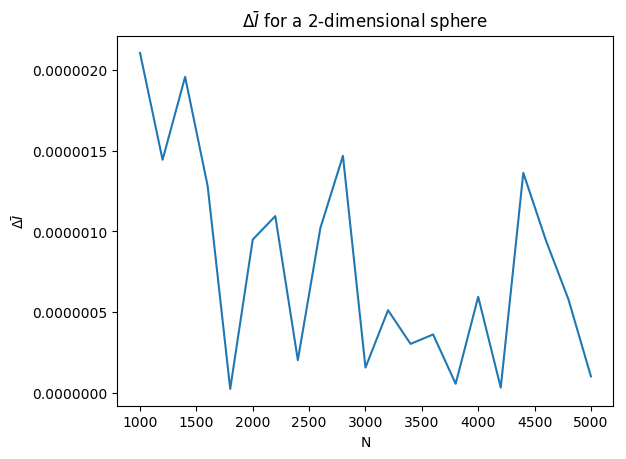

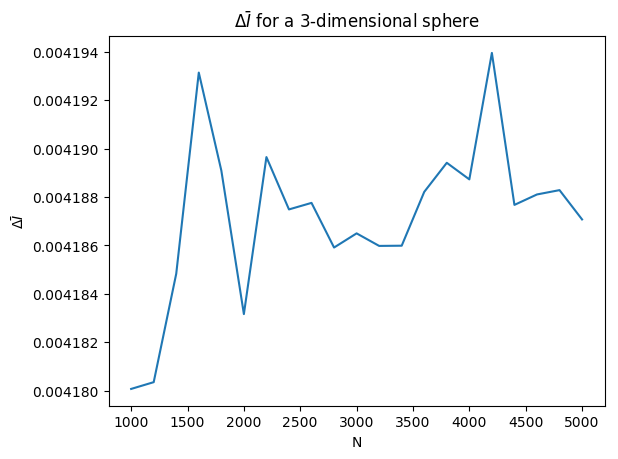

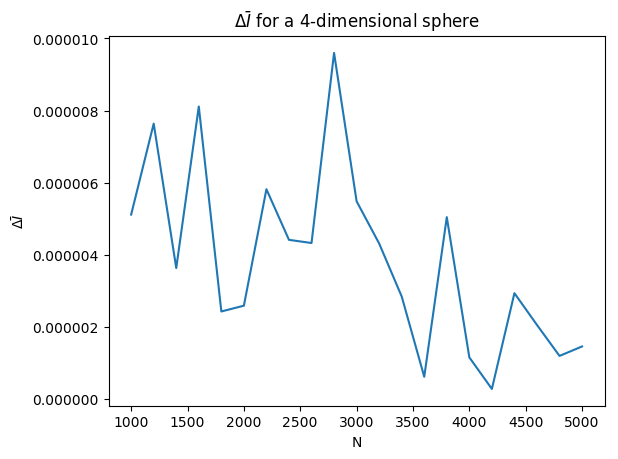

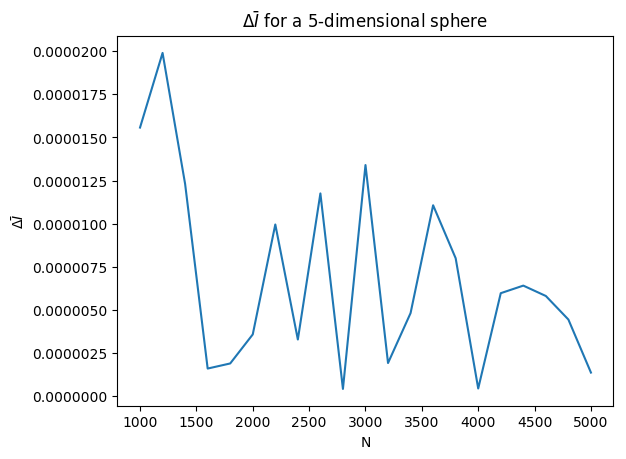

In [6]:
V_e_d(d) = pi^(d/2)/gamma(d/2+1)
M = 1000
steps = 21
d = 2
for d in [2 3 4 5]
    N = Int.(round.(linspace(1000,5000,steps),0))
    Y = Array{Float64}(steps)
    for i in 1:steps
        res = Array{Float64}(M)
        for j in 1:M
            res[j] = mDsphere(d, N[i])
        end
        Y[i] = abs(mean(res-V_e_d(d))/M)
    end
    figure(d)
    plot(N, Y)
    title("\$\\Delta \\bar I\$ for a $d-dimensional sphere")
    xlabel("N")
    ylabel("\$\\Delta \\bar I\$")
end
show()

# Aufgabe 3
### Teil a

In [7]:
function metropolis(x1, h, N, w)
    xs = [Float64(x1)]
    i = 1
    
    while i <= N
        r = 2*rand()-1
        y = xs[i] + h*r
        if(w(y)/w(xs[i]) >= rand())
            push!(xs, y)
            i += 1
        end
    end
    return xs
end
W(x) = (1/sqrt(pi))exp(-(x^2))

W (generic function with 1 method)

### Teil b

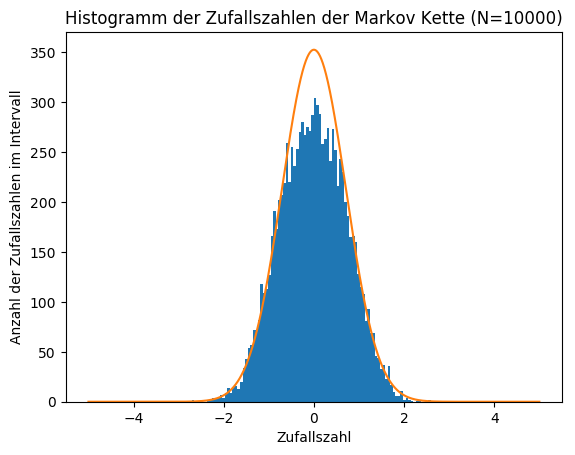

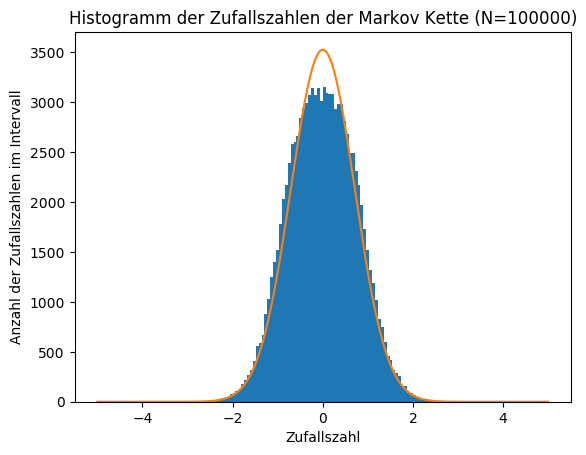

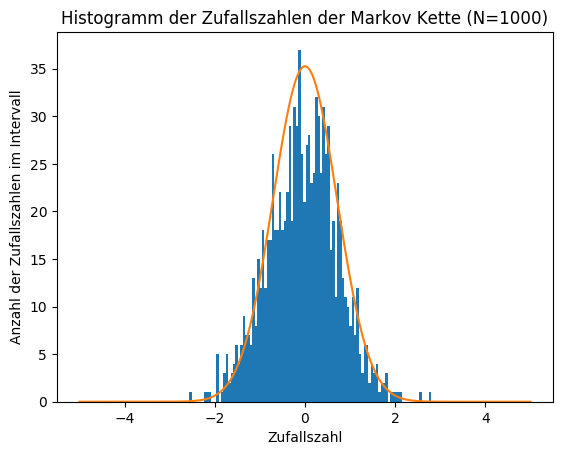

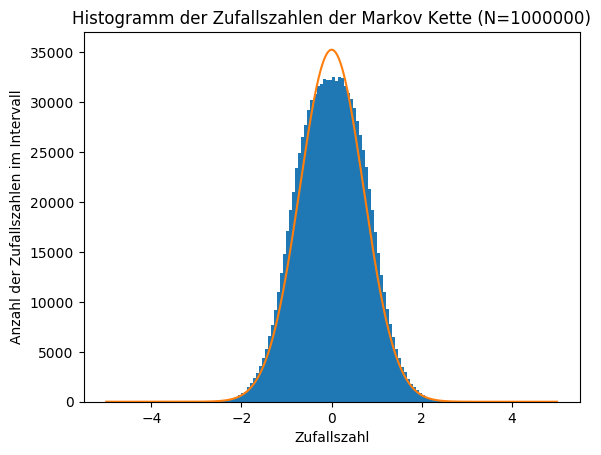

In [8]:
Xs = [10^3, 10^4, 10^5, 10^6]

for X in Xs
    figure(X)
    PyPlot.plt[:hist](metropolis(0, 2, X, W), 100)
    ys = []
    xs = linspace(-5, 5, 10000)
    for i in xs
        push!(ys, X/16*W(i))
    end
    plot(xs, ys)
    title("Histogramm der Zufallszahlen der Markov Kette (N=$X)")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
    show()
end

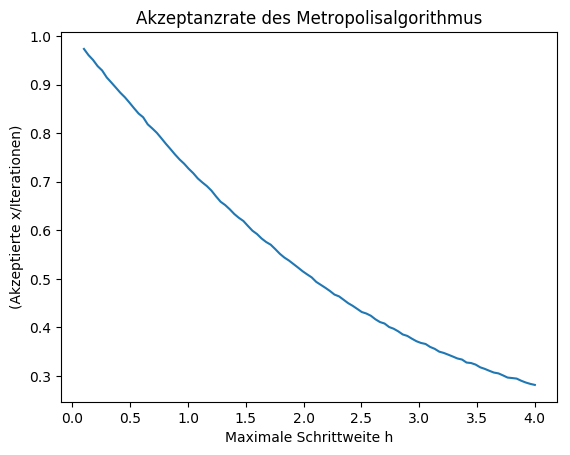

In [10]:
function metropolis_acceptance(x, h, N, w)
    accepted = total = 0
    while accepted < N
        r = 2*rand()-1
        y = x + h*r
        if(w(y)/w(x) >= rand())
            x = y
            accepted += 1
        end
        total += 1
    end
    return accepted/total
end
xs = linspace(0.1, 4, 100)
ys = []
for x in xs
    push!(ys, metropolis_acceptance(0.0, x, 10^5, W))
end
plot(xs, ys)
title("Akzeptanzrate des Metropolisalgorithmus")
xlabel("Maximale Schrittweite h")
ylabel("(Akzeptierte x/Iterationen)")
show()

### Teil d

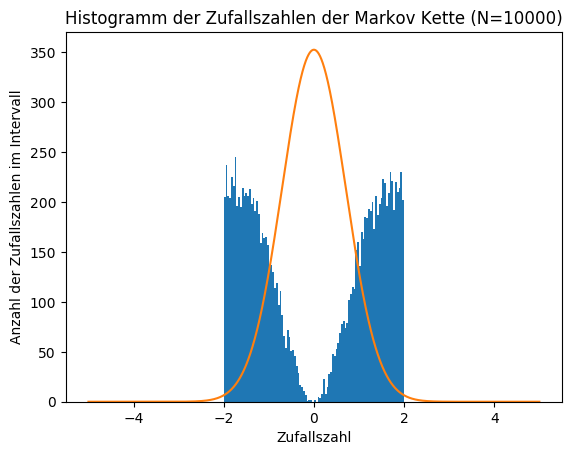

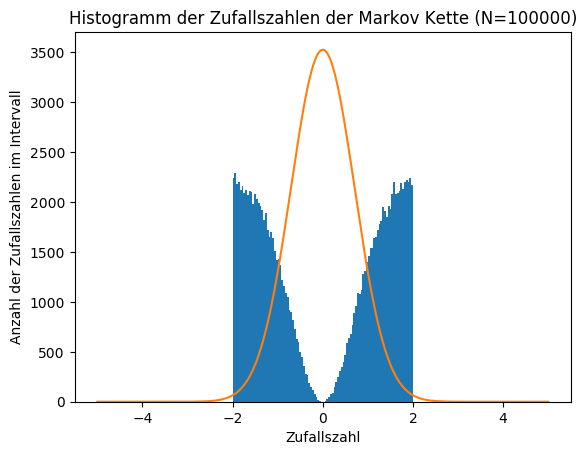

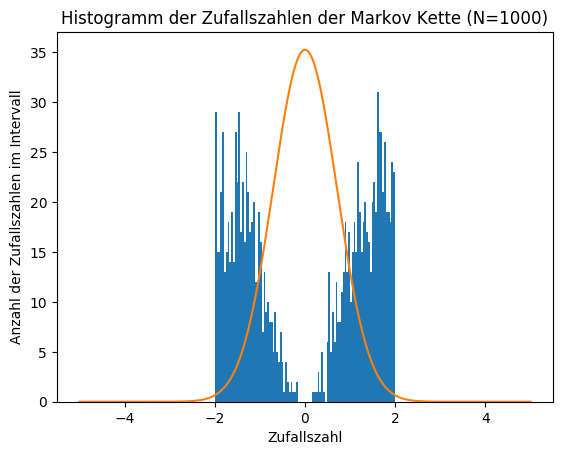

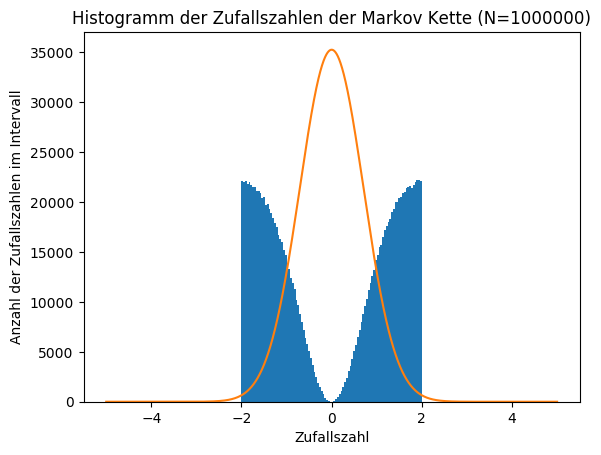

In [11]:
function metropolis_inverted(x, h, N, w)
    xs = []
    i = 1
    
    while i <= N
        r = 2*rand()-1
        y = x + h*r
        if(w(y)/w(x) >= rand())
            i += 1
        else
            push!(xs, y)
        end
    end
    return xs
end
Xs = [10^3, 10^4, 10^5, 10^6]

for X in Xs
    figure(X)
    PyPlot.plt[:hist](metropolis_inverted(0, 2, X, W), 100)
    ys = []
    xs = linspace(-5, 5, 10000)
    for i in xs
        push!(ys, X/16*W(i))
    end
    plot(xs, ys)
    title("Histogramm der Zufallszahlen der Markov Kette (N=$X)")
    xlabel("Zufallszahl")
    ylabel("Anzahl der Zufallszahlen im Intervall")
    show()
end